# Project 3 – Predicting a Categorical Target and Evaluating Performance

**Author:** Megan Chastain  
**Date:** November 6th, 2025  
**Summary:** In this project we will set up a machine to run three classifiers: Decision Tree, Support Vector Machine, and Neural Network. We will test the performance of three models and feature sets to view their effect on passenger survivability.

## Section 1. Import and Inspect the Data

In [111]:
# Imports
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [112]:
# Load Titanic dataset
titanic = sns.load_dataset("titanic")
# Display a few records to verify
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2. Data Exploration and Preparation

### 2.1 Handle Missing Values and Clean Data

In [113]:
# Impute missing values for age using the median:

median_age = titanic["age"].median()
titanic["age"] = titanic["age"].fillna(median_age)

# Fill in missing values for embark_town using the mode:

mode_embark = titanic["embark_town"].mode()[0]
titanic["embark_town"] = titanic["embark_town"].fillna(mode_embark)

## 2.2 Feature Engineering

In [114]:
# Create new feature
titanic["family_size"] = titanic["sibsp"] + titanic["parch"] + 1

# Map categories to numeric values
titanic["sex"] = titanic["sex"].map({"male": 0, "female": 1})
titanic["embarked"] = titanic["embarked"].map({"C": 0, "Q": 1, "S": 2})
titanic["alone"] = titanic["alone"].astype(int)

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target

**Case 1:** 

input features: alone
target: survived

**Case 2:**

input features - age
target: survived

**Case 3:**

input features -  age and family_size 
target: survived

### 3.2 Define X (features) and y (target)

In [115]:
# Case 1: Feature = alone

# Select the feature 'alone' as input
X1 = titanic[["alone"]]

# Select 'survived' as the target for the same rows
y1 = titanic["survived"]

In [116]:
# Case 2: Feature = age (drop if na or not available)

# Select the feature 'age', but drop rows where age is missing
X2 = titanic[["age"]].dropna()

# Select the matching 'survived' values using the same index
y2 = titanic.loc[X2.index, "survived"]

In [117]:
# Case 3: Features = Age + Family Size (drop if na or not available)

# Select both 'age' and 'family_size', and drop rows where missing (na)
X3 = titanic[["age", "family_size"]].dropna()

# Select the corresponding 'survived' values for those rows
y3 = titanic.loc[X3.index, "survived"]

### Reflection 3:

1. Why are these features selected?
2. Are there features that are likely to be highly predictive of survival?

## Section 4. Train a Classification Model (Decision Tree)

### 4.1 Split the Data

In [118]:
# Case 1: Feature = alone
splitter1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx1, test_idx1 in splitter1.split(X1, y1):
    X1_train = X1.iloc[train_idx1]
    X1_test = X1.iloc[test_idx1]
    y1_train = y1.iloc[train_idx1]
    y1_test = y1.iloc[test_idx1]

print("Case 1 - Alone:")
print("Train size:", len(X1_train), "| Test size:", len(X1_test))

Case 1 - Alone:
Train size: 712 | Test size: 179


In [119]:
# Case 2: Feature = age
splitter2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx2, test_idx2 in splitter2.split(X2, y2):
    X2_train = X2.iloc[train_idx2]
    X2_test = X2.iloc[test_idx2]
    y2_train = y2.iloc[train_idx2]
    y2_test = y2.iloc[test_idx2]

print("Case 2 - Age:")
print("Train size:", len(X2_train), "| Test size:", len(X2_test))

Case 2 - Age:
Train size: 712 | Test size: 179


In [120]:
# Case 3: Features = age + family_size
splitter3 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx3, test_idx3 in splitter3.split(X3, y3):
    X3_train = X3.iloc[train_idx3]
    X3_test = X3.iloc[test_idx3]
    y3_train = y3.iloc[train_idx3]
    y3_test = y3.iloc[test_idx3]

print("Case 3 - Age + Family Size:")
print("Train size:", len(X3_train), "| Test size:", len(X3_test))

Case 3 - Age + Family Size:
Train size: 712 | Test size: 179


### 4.2 Create and Train Model (Decision Tree)

In [121]:
# CASE 1: Decision Tree using alone
tree_model1 = DecisionTreeClassifier()
tree_model1.fit(X1_train, y1_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [122]:
# CASE 2: Decision Tree using age
tree_model2 = DecisionTreeClassifier()
tree_model2.fit(X2_train, y2_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [123]:
# CASE 3: Decision Tree using age and family_size
tree_model3 = DecisionTreeClassifier()
tree_model3.fit(X3_train, y3_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 4.3 Predict and Evaluate Model Performance

In [124]:
# Predict on training data
y1_pred = tree_model1.predict(X1_train)
print("Results for Decision Tree on training data (Case 1 - alone):")
print(classification_report(y1_train, y1_pred))

# Predict on test data
y1_test_pred = tree_model1.predict(X1_test)
print("Results for Decision Tree on test data (Case 1 - alone):")
print(classification_report(y1_test, y1_test_pred))

Results for Decision Tree on training data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712

Results for Decision Tree on test data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [125]:
# Predict on training data
y2_pred = tree_model2.predict(X2_train)
print("Results for Decision Tree on training data (Case 2 - age):")
print(classification_report(y2_train, y2_pred))

# Predict on test data
y2_test_pred = tree_model2.predict(X2_test)
print("Results for Decision Tree on test data (Case 2 - age):")
print(classification_report(y2_test, y2_test_pred))

Results for Decision Tree on training data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712

Results for Decision Tree on test data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



In [126]:
# Predict on training data
y3_pred = tree_model3.predict(X3_train)
print("Results for Decision Tree on training data (Case 3 - age + family_size):")
print(classification_report(y3_train, y3_pred))

# Predict on test data
y3_test_pred = tree_model3.predict(X3_test)
print("Results for Decision Tree on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_test_pred))

Results for Decision Tree on training data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712

Results for Decision Tree on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       110
           1       0.46      0.35      0.40        69

    accuracy                           0.59       179
   macro avg       0.55      0.55      0.54       179
weighted avg       0.57      0.59      0.58       179



### 4.4 Report Confusion Matrix (as a heatmap)

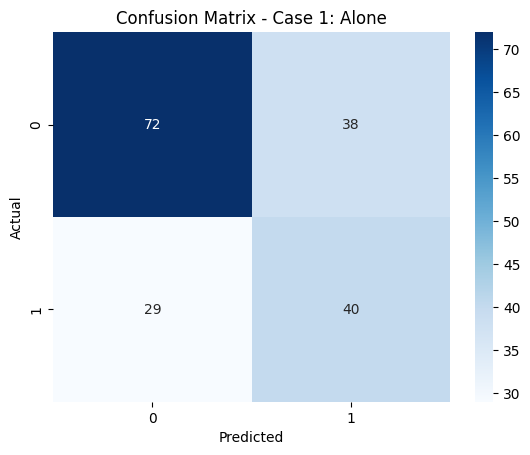

In [127]:
# Create confusion matrix for test predictions (Case 1)
cm1 = confusion_matrix(y1_test, y1_test_pred)

# Plot heatmap
sns.heatmap(cm1, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Case 1: Alone")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

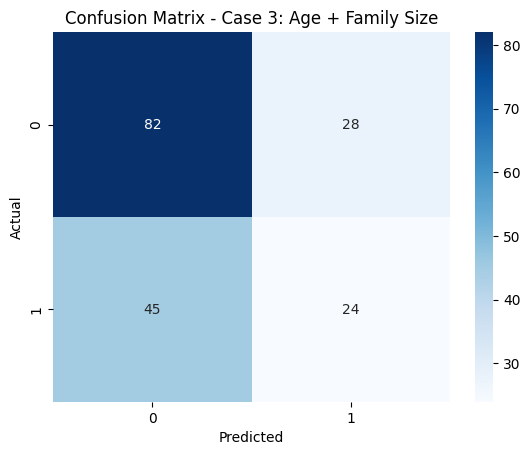

In [129]:
# Create confusion matrix for test predictions (Case 3)
cm3 = confusion_matrix(y3_test, y3_test_pred)

# Plot heatmap
sns.heatmap(cm3, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Case 3: Age + Family Size")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 4.5 Report Decision Tree Plot

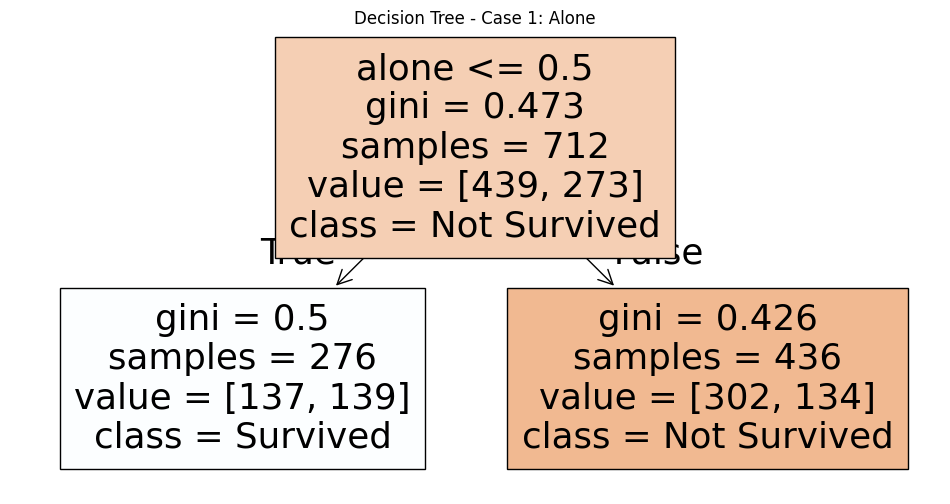

In [130]:
# Case 1

# Plot Decision Tree for Case 1
fig = plt.figure(figsize=(12, 6))
plot_tree(
    tree_model1, feature_names=X1.columns, class_names=["Not Survived", "Survived"], filled=True
)
plt.title("Decision Tree - Case 1: Alone")
plt.show()

# Save image
fig.savefig("tree_case1_alone.png")

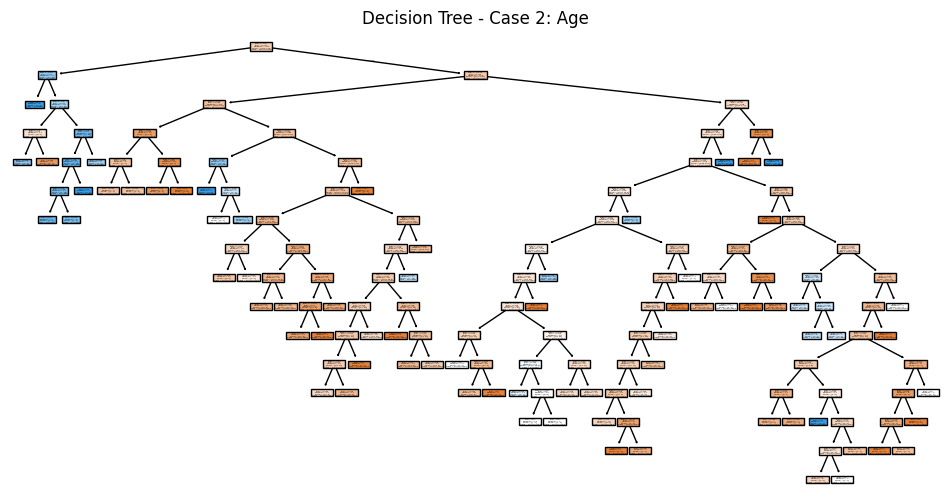

In [131]:
# Case 2

# Plot Decision Tree for Case 2
fig = plt.figure(figsize=(12, 6))
plot_tree(
    tree_model2, feature_names=X2.columns, class_names=["Not Survived", "Survived"], filled=True
)
plt.title("Decision Tree - Case 2: Age")
plt.show()

# Save image
fig.savefig("tree_case2_age.png")

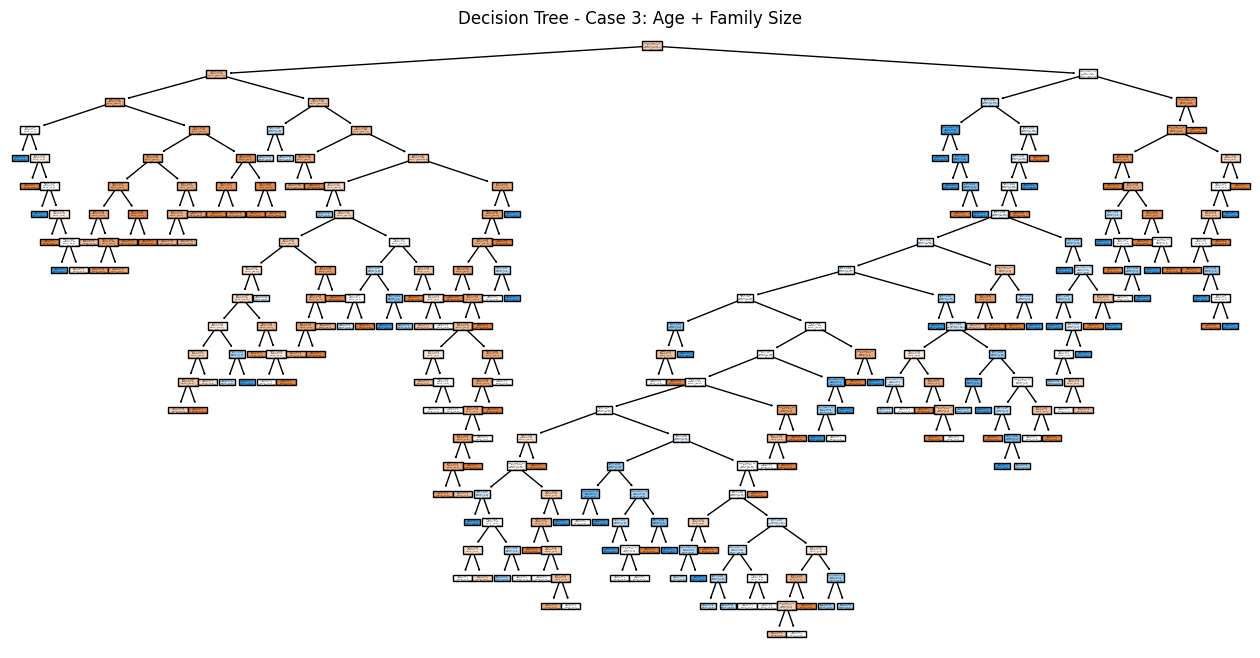

In [132]:
# Case 3

# Plot Decision Tree for Case 3
fig = plt.figure(figsize=(16, 8))
plot_tree(
    tree_model3, feature_names=X3.columns, class_names=["Not Survived", "Survived"], filled=True
)
plt.title("Decision Tree - Case 3: Age + Family Size")
plt.show()

# Save image
fig.savefig("tree_case3_age_family.png")

### Reflection 4:
1. How well did the different cases perform?
2. Are there any surprising results?
3. Which inputs worked better? 

## Section 5. Compare Alternative Models (SVC, NN)

### 5.1 Train and Evaluate Model (SVC)

In [133]:
# RBF Kernel (default) - same as calling SVC()
# svc_model = SVC(kernel='rbf')
# svc_model.fit(X1_train, y1_train)

# Linear Kernel
# svc_model = SVC(kernel='linear')
# svc_model.fit(X1_train, y1_train)

# Polynomial Kernel (e.g., with degree=3)
# svc_model = SVC(kernel='poly', degree=3)
# svc_model.fit(X1_train, y1_train)

# Sigmoid Kernel
# svc_model = SVC(kernel='sigmoid')
# svc_model.fit(X1_train, y1_train)

In [134]:
# Case 1

# CASE 1: SVC using 'alone'
svc_model1 = SVC()
svc_model1.fit(X1_train, y1_train)
y1_svc_pred = svc_model1.predict(X1_test)
print("Results for SVC on test data (Case 1 - alone):")
print(classification_report(y1_test, y1_svc_pred))

Results for SVC on test data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [135]:
# Case 2

# CASE 2: SVC using 'age'
svc_model2 = SVC()
svc_model2.fit(X2_train, y2_train)
y2_svc_pred = svc_model2.predict(X2_test)
print("Results for SVC on test data (Case 2 - age):")
print(classification_report(y2_test, y2_svc_pred))

Results for SVC on test data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



In [143]:
# Case 3

# CASE 3: SVC using 'age' and 'family size'
svc_model3 = SVC()
svc_model3.fit(X3_train, y3_train)
y3_svc_pred = svc_model3.predict(X3_test)
print("Results for SVC on test data (Case 3 - age and family size):")
print(classification_report(y3_test, y3_svc_pred))

Results for SVC on test data (Case 3 - age and family size):
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



### 5.2 Visualize Support Vectors (1D Case 1 and 2D Case 3)

1. Split the data into two groups:

Survived – Passengers who survived the Titanic sinking (value = 1).
Not Survived – Passengers who did not survive (value = 0).

2. Plot each category using different shapes and colors:

Yellow squares ('s') for survived passengers
Cyan triangles ('^') for non-survived passengers

3. Overlay the support vectors — the critical data points used to define the decision boundary — with black plus signs.

Black pluses ('+') will represent the support vectors.
Since the support vectors are plotted last, they appear on top of the data points and are not obscured.

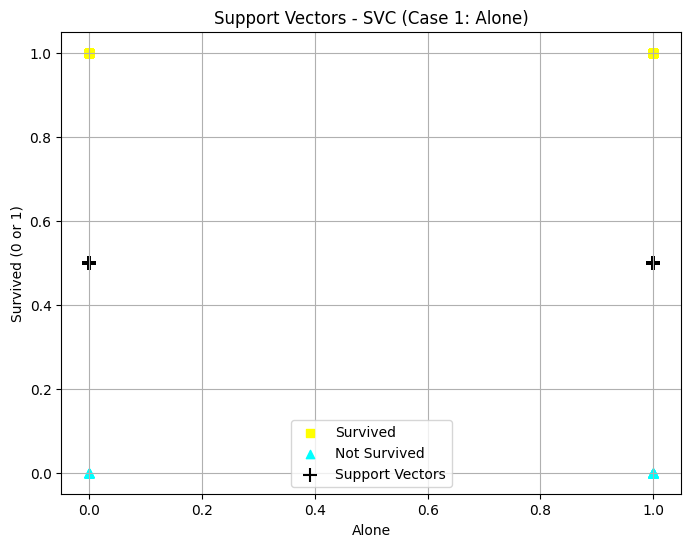

In [137]:
# Visualize support vectors for Case 1 (feature = 'alone')

# Create groups based on survival
survived_alone = X1_test.loc[y1_test == 1, "alone"]
not_survived_alone = X1_test.loc[y1_test == 0, "alone"]

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))

plt.scatter(survived_alone, y1_test.loc[y1_test == 1], c="yellow", marker="s", label="Survived")
plt.scatter(
    not_survived_alone, y1_test.loc[y1_test == 0], c="cyan", marker="^", label="Not Survived"
)

# Overlay support vectors
# Check if the model has support_vectors_ (it may not if it failed to converge)
if hasattr(svc_model1, "support_vectors_"):
    # Get the X-values of the support vectors (only one feature in Case 1
    support_x = svc_model1.support_vectors_[:, 0]  # First feature (alone)
    # Plot them using a fixed Y-value (0.5) to place them between classes visually
    # We use a larger size (s=100) and a plus symbol to make them stand out
    plt.scatter(
        support_x, [0.5] * len(support_x), c="black", marker="+", s=100, label="Support Vectors"
    )

# Add labels and legend
plt.xlabel("Alone")
plt.ylabel("Survived (0 or 1)")
plt.title("Support Vectors - SVC (Case 1: Alone)")
plt.legend()
plt.grid(True)
plt.show()

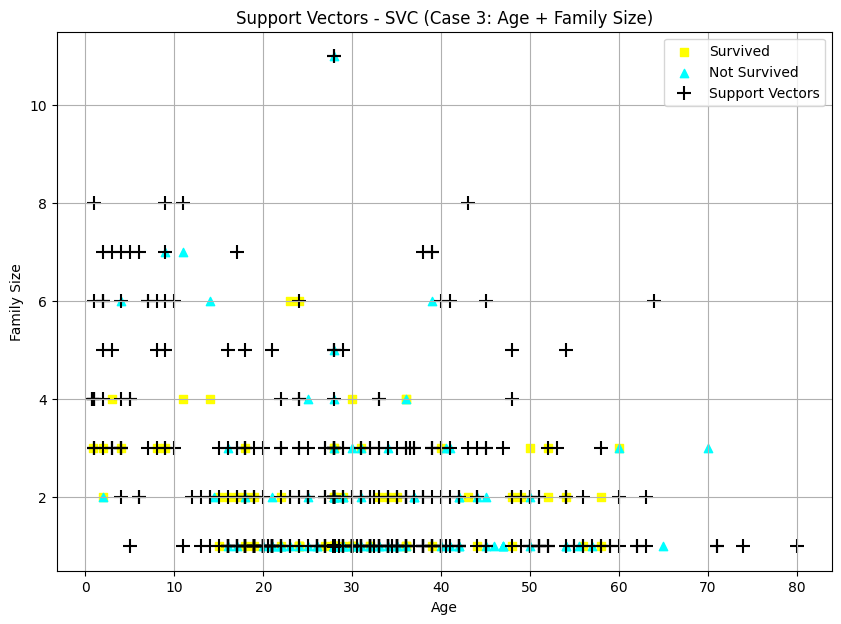

In [138]:
# Case 3. Two Inputs, Two Dimensional Scatter Plot

# Visualize support vectors for Case 3 (features = 'age', 'family_size') - more interesting (two dimensional)

# Create groups based on survival
survived = X3_test[y3_test == 1]
not_survived = X3_test[y3_test == 0]

# Create scatter plot
plt.figure(figsize=(10, 7))

# Plot survived (yellow squares)
plt.scatter(survived["age"], survived["family_size"], c="yellow", marker="s", label="Survived")

# Plot not survived (cyan triangles)
plt.scatter(
    not_survived["age"], not_survived["family_size"], c="cyan", marker="^", label="Not Survived"
)

# Overlay support vectors
if hasattr(svc_model3, "support_vectors_"):
    support_vectors = svc_model3.support_vectors_
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        c="black",
        marker="+",
        s=100,
        label="Support Vectors",
    )

# Add labels, title, and legend
plt.xlabel("Age")
plt.ylabel("Family Size")
plt.title("Support Vectors - SVC (Case 3: Age + Family Size)")
plt.legend()
plt.grid(True)
plt.show()

### 5.3 Train and Evaluate Model (Neural Network on Case 3)

We'll use:

1. An input (visible) layer  - with age and family size - that's two input neurons visible to us and the model.
 Three hidden layers with decreasing sizes (50, 25, 10) - These are layers of neurons the model creates to learn patterns. Each neuron receives input from all neurons in the previous layer, applies a function, and passes the result on.
2. One output layer - a single neuron with our probability of survival (yes / no for a binary classification). 
3. The lbgfs solver which works better with small data sets like the Titanic
4. A higher number of maximum iterations (max_iter) to help it converge.
5. A fixed random_state so the work is reproducible and doesn't change each time we run it. 

In [139]:
# Train NN for Case 3 (age + family_size)
nn_model3 = MLPClassifier(
    hidden_layer_sizes=(50, 25, 10), solver="lbfgs", max_iter=1000, random_state=42
)

nn_model3.fit(X3_train, y3_train)

,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


In [140]:
# Predict and evaluate Neural Network model:

# Predict on test data (Case 3)
y3_nn_pred = nn_model3.predict(X3_test)

# Print classification report
print("Results for Neural Network on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_nn_pred))

Results for Neural Network on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       110
           1       0.57      0.46      0.51        69

    accuracy                           0.66       179
   macro avg       0.64      0.62      0.63       179
weighted avg       0.65      0.66      0.65       179



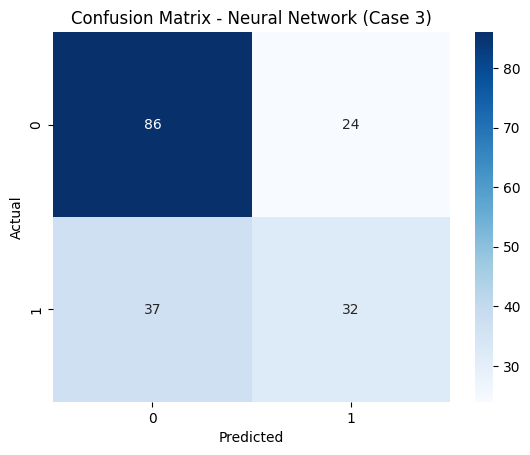

In [141]:
# Plot confusion matrix:

# Create confusion matrix
cm_nn3 = confusion_matrix(y3_test, y3_nn_pred)

# Plot heatmap
sns.heatmap(cm_nn3, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Neural Network (Case 3)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 5.4 Visualize (Neural Network on Case 3)

C:\Users\Megan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


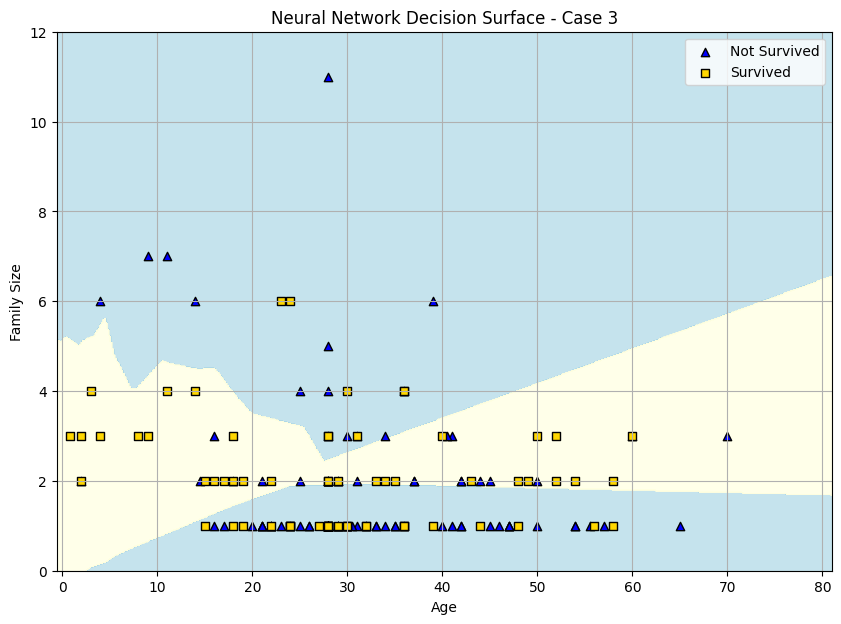

In [142]:
# Get the range of our two features - use padding to enhance appearance

padding = 1
x_min, x_max = X3["age"].min() - padding, X3["age"].max() + padding
y_min, y_max = X3["family_size"].min() - padding, X3["family_size"].max() + padding


# Create a meshgrid (all combinations of age and family_size)

# A grid of values covering the entire input space
# np.linspace(start, stop, num) generates evenly spaced values (like a ruler)
# Here, we create 500 points between min and max for each axis
# np.meshgrid creates a coordinate grid from the two arrays

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))


# Flatten the grid arrays and prepare them for prediction
# np.c_ stacks the flattened xx and yy into coordinate pairs
# .ravel() flattens a 2D array into 1D (required by the model for prediction)

Z = nn_model3.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted results to match the original 2D grid shape
Z = Z.reshape(xx.shape)


# Plot the decision surface (background) showing predicted survival zones

# Blue for 0, yellow for 1 - change this up as you like
plt.figure(figsize=(10, 7))
cmap_background = ListedColormap(["lightblue", "lightyellow"])

plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.7)


# Overlay the actual test data points for visual comparison


# Plot passengers who did NOT survive (0) as blue triangles
plt.scatter(
    X3_test["age"][y3_test == 0],
    X3_test["family_size"][y3_test == 0],
    c="blue",
    marker="^",
    edgecolor="k",
    label="Not Survived",
)

# Plot passengers who DID survive (1) as gold squares
plt.scatter(
    X3_test["age"][y3_test == 1],
    X3_test["family_size"][y3_test == 1],
    c="gold",
    marker="s",
    edgecolor="k",
    label="Survived",
)

# Add axis labels, title, legend, and grid
plt.xlabel("Age")
plt.ylabel("Family Size")
plt.title("Neural Network Decision Surface - Case 3")
plt.legend()
plt.grid(True)
plt.show()

## Section 6. Final Thoughts & Insights

### Summary of Findings

 

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| Decision Tree | Case 1 | alone | 63% | 71% | 65% | 68% | - |
|                   | Case 2 | age | 61% | 63% | 89% | 74% | - |
|                   | Case 3 | age + family_size | 59% | 65% | 75% | 69% | - |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| SVM (RBF Kernel)| Case 1 | alone | 63% | 71% | 65% | 68% | - |
|                    | Case 2 | age | 63% | 63% | 98% | 77% | - |
|                    | Case 3 | age + family_size | 63% | 63% | 98% | 77% | - |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| Neural Network (MLP) | Case 1 | alone | xx.xx% | xx.xx% | xx.xx% | xx.xx% | - |
|                    | Case 2 | age | xx.xx% | xx.xx% | xx.xx% | xx.xx% | - |
|                    | Case 3 | age + family_size | 66% | 70% | 78% | 74% | - |

### Reflection 5:
1. How well did each of these new models/cases perform? They were very similar to the predicted data.
2. Are there any surprising results or insights? Some of the survivor's family size was larger than I would have expected.
3. Why might one model outperform the others? Based on the distribution of the data, one model may be able to better represent it.

### Discuss challenges faced. 
* Some challenges I faced were with the code and getting name errors. 
## Next steps to gain more insights and/or to explore classification models